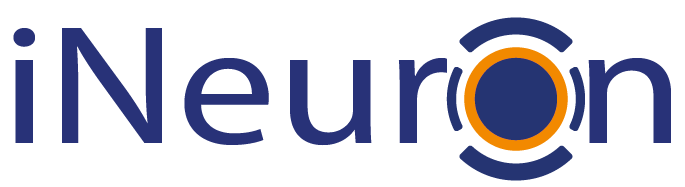

# Linear Regression Practical Implementation of Individual Household Electric Power Consumption Dataset

**Submitted By:- Atanu Kundu**

### Machine Learning Pipeline

* Data Ingestion
* Exploratory Data Analysis(EDA)
* Preprocessing
    1. Pickling for the preprocessing object(save the preprocessing model)
* Model
    1. **Regression:** Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, Support Vector Regression 

### Problem Statement
Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

**Source:** https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

### Attribute Information
1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## <span style='color:Green '> Importing required libraries</span>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## <span style='color:green '>Reading the Dataset</span>

In [26]:
data=pd.read_csv('household_power_consumption.txt',delimiter=";")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


#### Shape of data

In [27]:
data.shape

(2075259, 9)

#### Taking Sample Data of 50K

In [28]:
data = data.sample(n=50000,ignore_index=True)

In [29]:
data.shape

(50000, 9)

#### Information Of Data

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   50000 non-null  object 
 1   Time                   50000 non-null  object 
 2   Global_active_power    50000 non-null  object 
 3   Global_reactive_power  50000 non-null  object 
 4   Voltage                50000 non-null  object 
 5   Global_intensity       50000 non-null  object 
 6   Sub_metering_1         50000 non-null  object 
 7   Sub_metering_2         50000 non-null  object 
 8   Sub_metering_3         49407 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


#### Checking Null Values

In [31]:
data.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           593
dtype: int64

In [10]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [32]:
data["Date"] = pd.to_datetime(data["Date"])

In [33]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [18]:
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year
0,2008-11-15,11:38:00,0.368,0.070,237.280,1.600,0.000,0.000,0.0,15,11,2008
1,2009-07-22,23:50:00,1.056,0.356,244.110,4.400,0.000,2.000,0.0,22,7,2009
2,2010-05-07,20:34:00,1.698,0.470,237.760,7.400,1.000,1.000,12.0,7,5,2010
3,2010-11-25,17:48:00,1.74,0.0,237.58,7.2,0.0,0.0,0.0,25,11,2010
4,2007-09-15,21:38:00,0.732,0.106,239.720,3.000,0.000,0.000,0.0,15,9,2007


In [34]:
data["Time"] = pd.to_datetime(data["Time"])

In [35]:
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute

In [36]:
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minute
0,2008-11-07,2022-11-05 18:33:00,1.524,0.298,238.220,6.400,0.000,0.000,18.0,7,11,2008,18,33
1,2008-02-17,2022-11-05 05:41:00,0.408,0.210,246.330,1.800,0.000,0.000,0.0,17,2,2008,5,41
2,2009-08-04,2022-11-05 15:32:00,0.684,0.248,244.050,3.000,0.000,1.000,1.0,4,8,2009,15,32
3,2010-03-19,2022-11-05 06:59:00,0.652,0.300,243.590,2.800,0.000,1.000,1.0,19,3,2010,6,59
4,2008-12-29,2022-11-05 21:04:00,0.212,0.000,243.170,0.800,0.000,0.000,0.0,29,12,2008,21,4


In [38]:
data.drop(['Date','Time'],axis=1,inplace=True)

In [39]:
for colum in data.columns:
    data[colum].replace('?',np.nan,inplace=True)

In [41]:
for colum in data.columns[:6]:
    data[colum] = data[colum].astype(float)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49407 non-null  float64
 1   Global_reactive_power  49407 non-null  float64
 2   Voltage                49407 non-null  float64
 3   Global_intensity       49407 non-null  float64
 4   Sub_metering_1         49407 non-null  float64
 5   Sub_metering_2         49407 non-null  float64
 6   Sub_metering_3         49407 non-null  float64
 7   Day                    50000 non-null  int64  
 8   Month                  50000 non-null  int64  
 9   Year                   50000 non-null  int64  
 10  Hour                   50000 non-null  int64  
 11  Minute                 50000 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 4.6 MB


In [43]:
data['Total Consumption'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']

In [61]:
data.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

In [62]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,49407.0,1.091789,1.056856,0.076,0.308,0.602,1.532,9.392
Global_reactive_power,49407.0,0.123877,0.112297,0.000,0.048,0.100,0.194,1.070
Voltage,49407.0,240.821447,3.225329,224.240,238.980,240.990,242.860,253.260
Global_intensity,49407.0,4.627810,4.442311,0.200,1.400,2.600,6.400,41.400
Day,50000.0,15.752680,8.822897,1.000,8.000,16.000,23.000,31.000
Month,50000.0,6.480640,3.434330,1.000,4.000,6.000,9.000,12.000
Year,50000.0,2008.430360,1.128794,2006.000,2007.000,2008.000,2009.000,2010.000
Hour,50000.0,11.474160,6.932651,0.000,5.000,11.000,18.000,23.000
Minute,50000.0,29.383120,17.393075,0.000,14.000,29.000,45.000,59.000
Total Consumption,49407.0,8.903475,12.859791,0.000,0.000,1.000,18.000,128.000


In [63]:
data.isnull().sum()

Global_active_power      593
Global_reactive_power    593
Voltage                  593
Global_intensity         593
Day                        0
Month                      0
Year                       0
Hour                       0
Minute                     0
Total Consumption        593
dtype: int64

In [64]:
data.dropna(inplace=True)

In [65]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Day                      0
Month                    0
Year                     0
Hour                     0
Minute                   0
Total Consumption        0
dtype: int64

In [66]:
data.duplicated().sum()

0

In [68]:
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minute,Total Consumption
0,1.524,0.298,238.22,6.4,7,11,2008,18,33,18.0
1,0.408,0.210,246.33,1.8,17,2,2008,5,41,0.0
2,0.684,0.248,244.05,3.0,4,8,2009,15,32,2.0
3,0.652,0.300,243.59,2.8,19,3,2010,6,59,2.0
4,0.212,0.000,243.17,0.8,29,12,2008,21,4,0.0


In [69]:
data.shape

(49407, 10)

## Univariate Analysis

In [70]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

In [71]:
numeric_features

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Day',
 'Month',
 'Year',
 'Hour',
 'Minute',
 'Total Consumption']

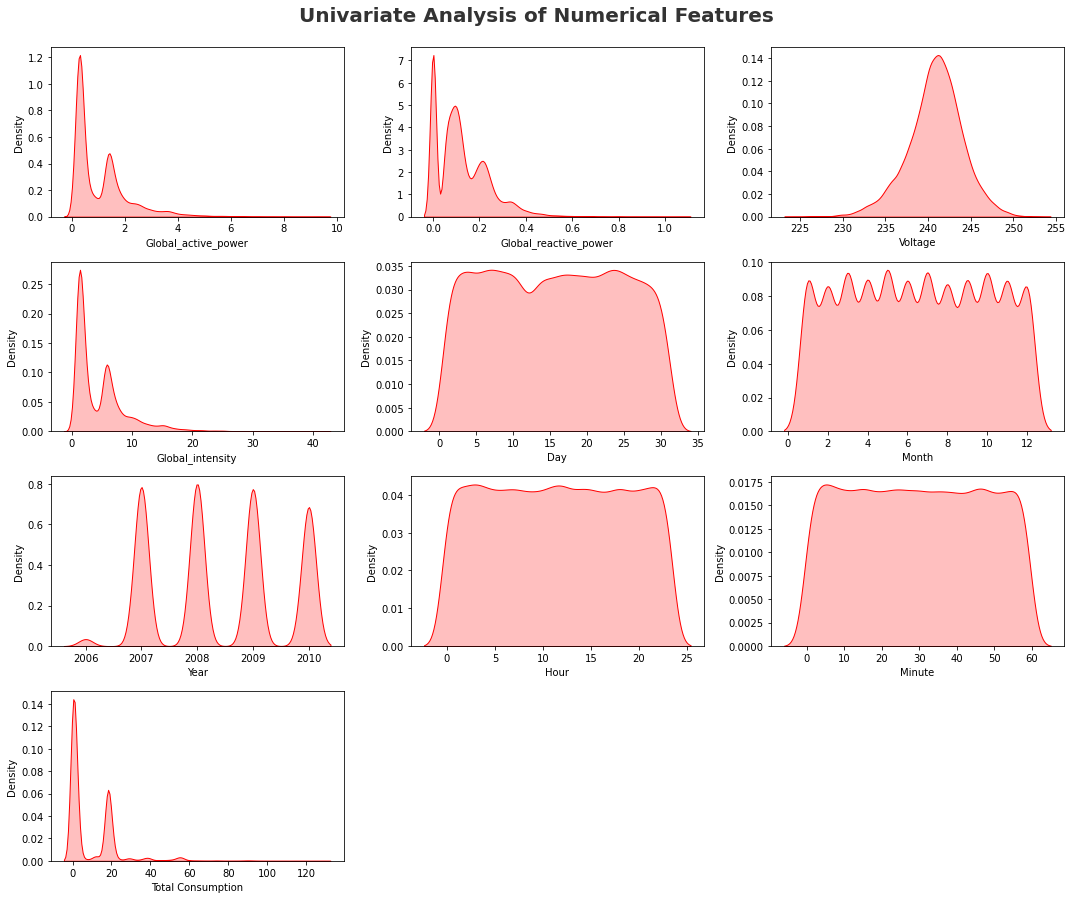

In [72]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Bivariate Analysis

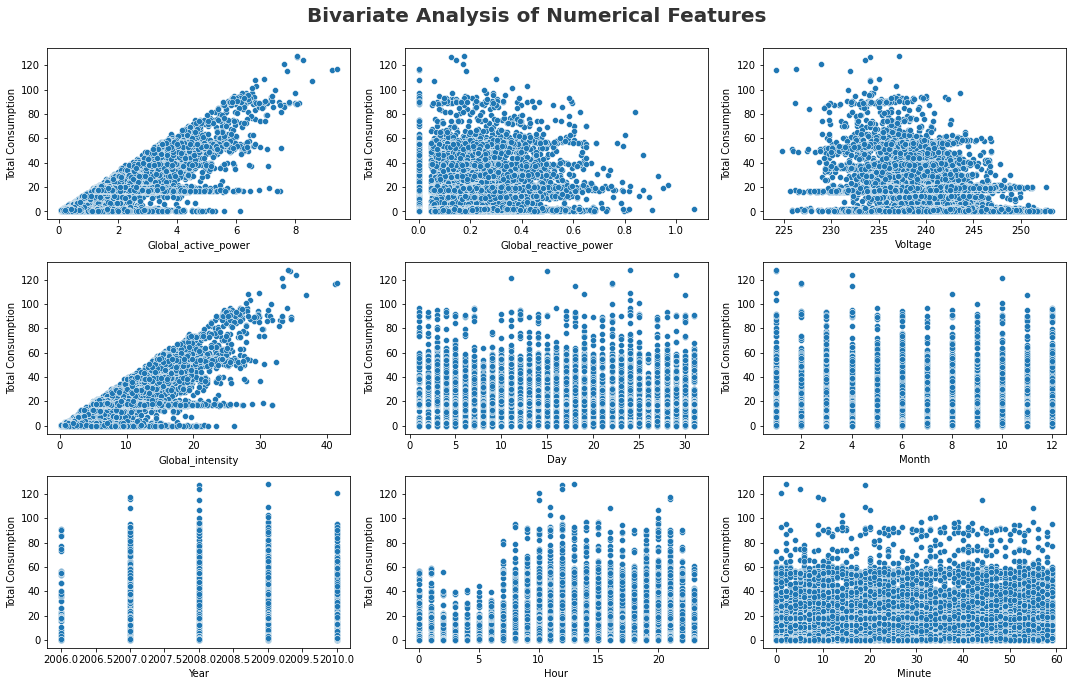

In [79]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)-1):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=data,x=numeric_features[i],y='Total Consumption')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Visualization of Target Feature

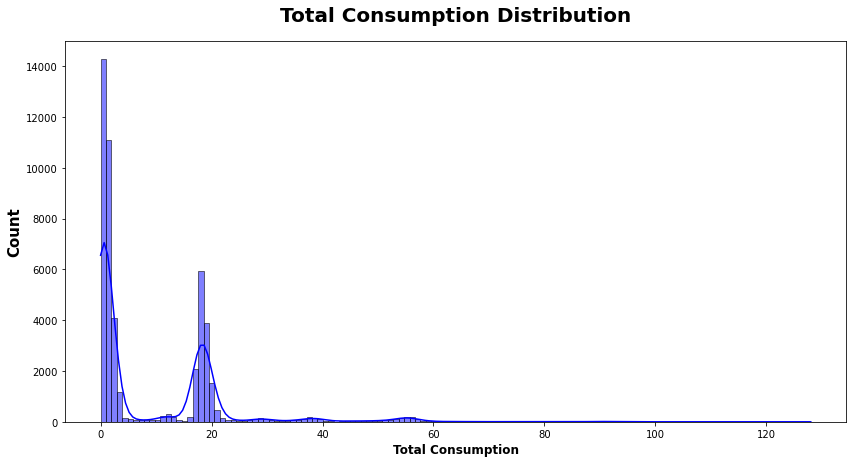

In [77]:
plt.subplots(figsize=(14,7))
sns.histplot(x=data['Total Consumption'], ec = "black", color='blue', kde=True)
plt.title("Total Consumption Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Total Consumption", weight="bold", fontsize=12)
plt.show()

## Find Outlier

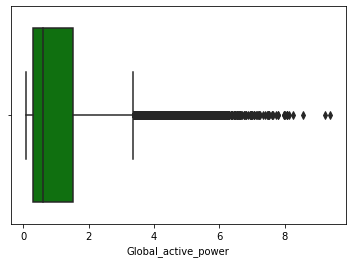

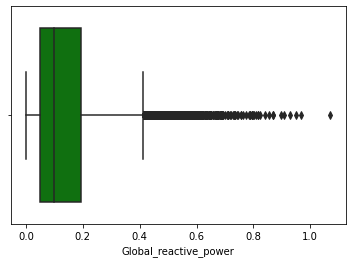

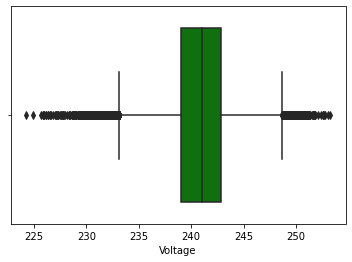

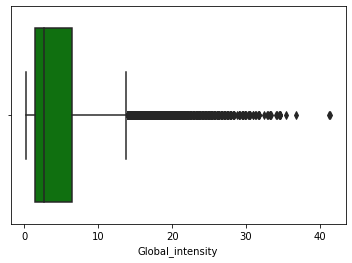

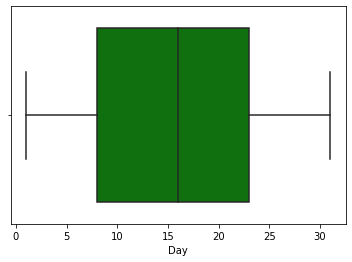

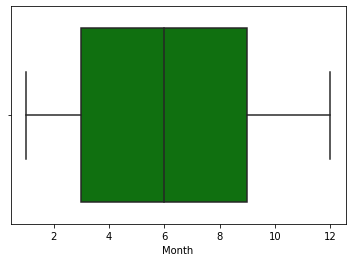

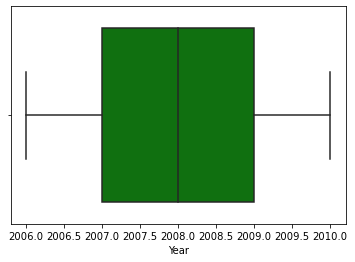

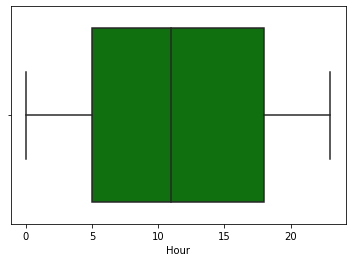

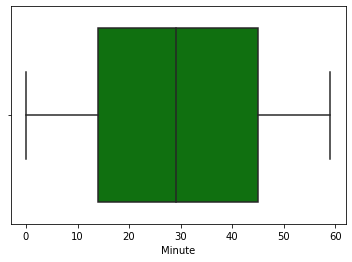

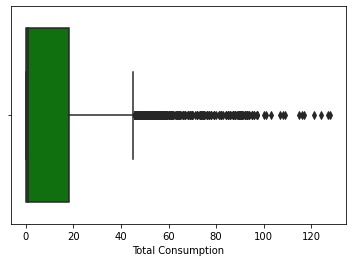

In [80]:
for feature in numeric_features:
    sns.boxplot(data=data,x=feature,color='g')
    plt.show()

## Multivariate Analysis

In [81]:
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minute,Total Consumption
Global_active_power,1.000000,0.245836,-0.400865,0.998913,-0.010183,0.006757,-0.031687,0.279026,0.000415,0.848122
Global_reactive_power,0.245836,1.000000,-0.112401,0.264419,0.006254,0.007977,0.046790,0.131751,-0.005262,0.180371
Voltage,-0.400865,-0.112401,1.000000,-0.412348,0.007998,0.034561,0.254497,-0.176968,0.012222,-0.346684
Global_intensity,0.998913,0.264419,-0.412348,1.000000,-0.010218,0.006766,-0.035964,0.279382,0.000176,0.845233
Day,-0.010183,0.006254,0.007998,-0.010218,1.000000,0.010716,-0.034434,-0.007402,0.000371,-0.009805
Month,0.006757,0.007977,0.034561,0.006766,0.010716,1.000000,-0.081189,-0.006788,0.007953,-0.004288
Year,-0.031687,0.046790,0.254497,-0.035964,-0.034434,-0.081189,1.000000,0.003507,0.005519,0.020405
Hour,0.279026,0.131751,-0.176968,0.279382,-0.007402,-0.006788,0.003507,1.000000,0.001204,0.164194
Minute,0.000415,-0.005262,0.012222,0.000176,0.000371,0.007953,0.005519,0.001204,1.000000,-0.000812
Total Consumption,0.848122,0.180371,-0.346684,0.845233,-0.009805,-0.004288,0.020405,0.164194,-0.000812,1.000000


<AxesSubplot:>

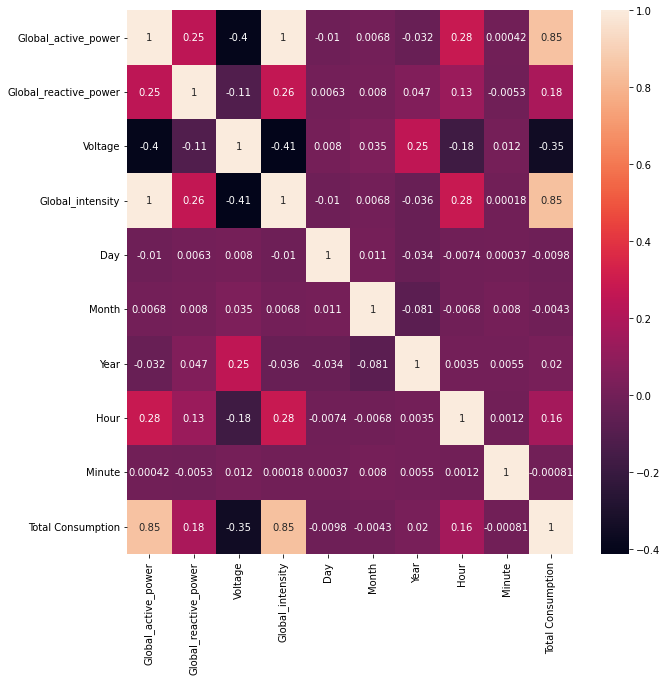

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

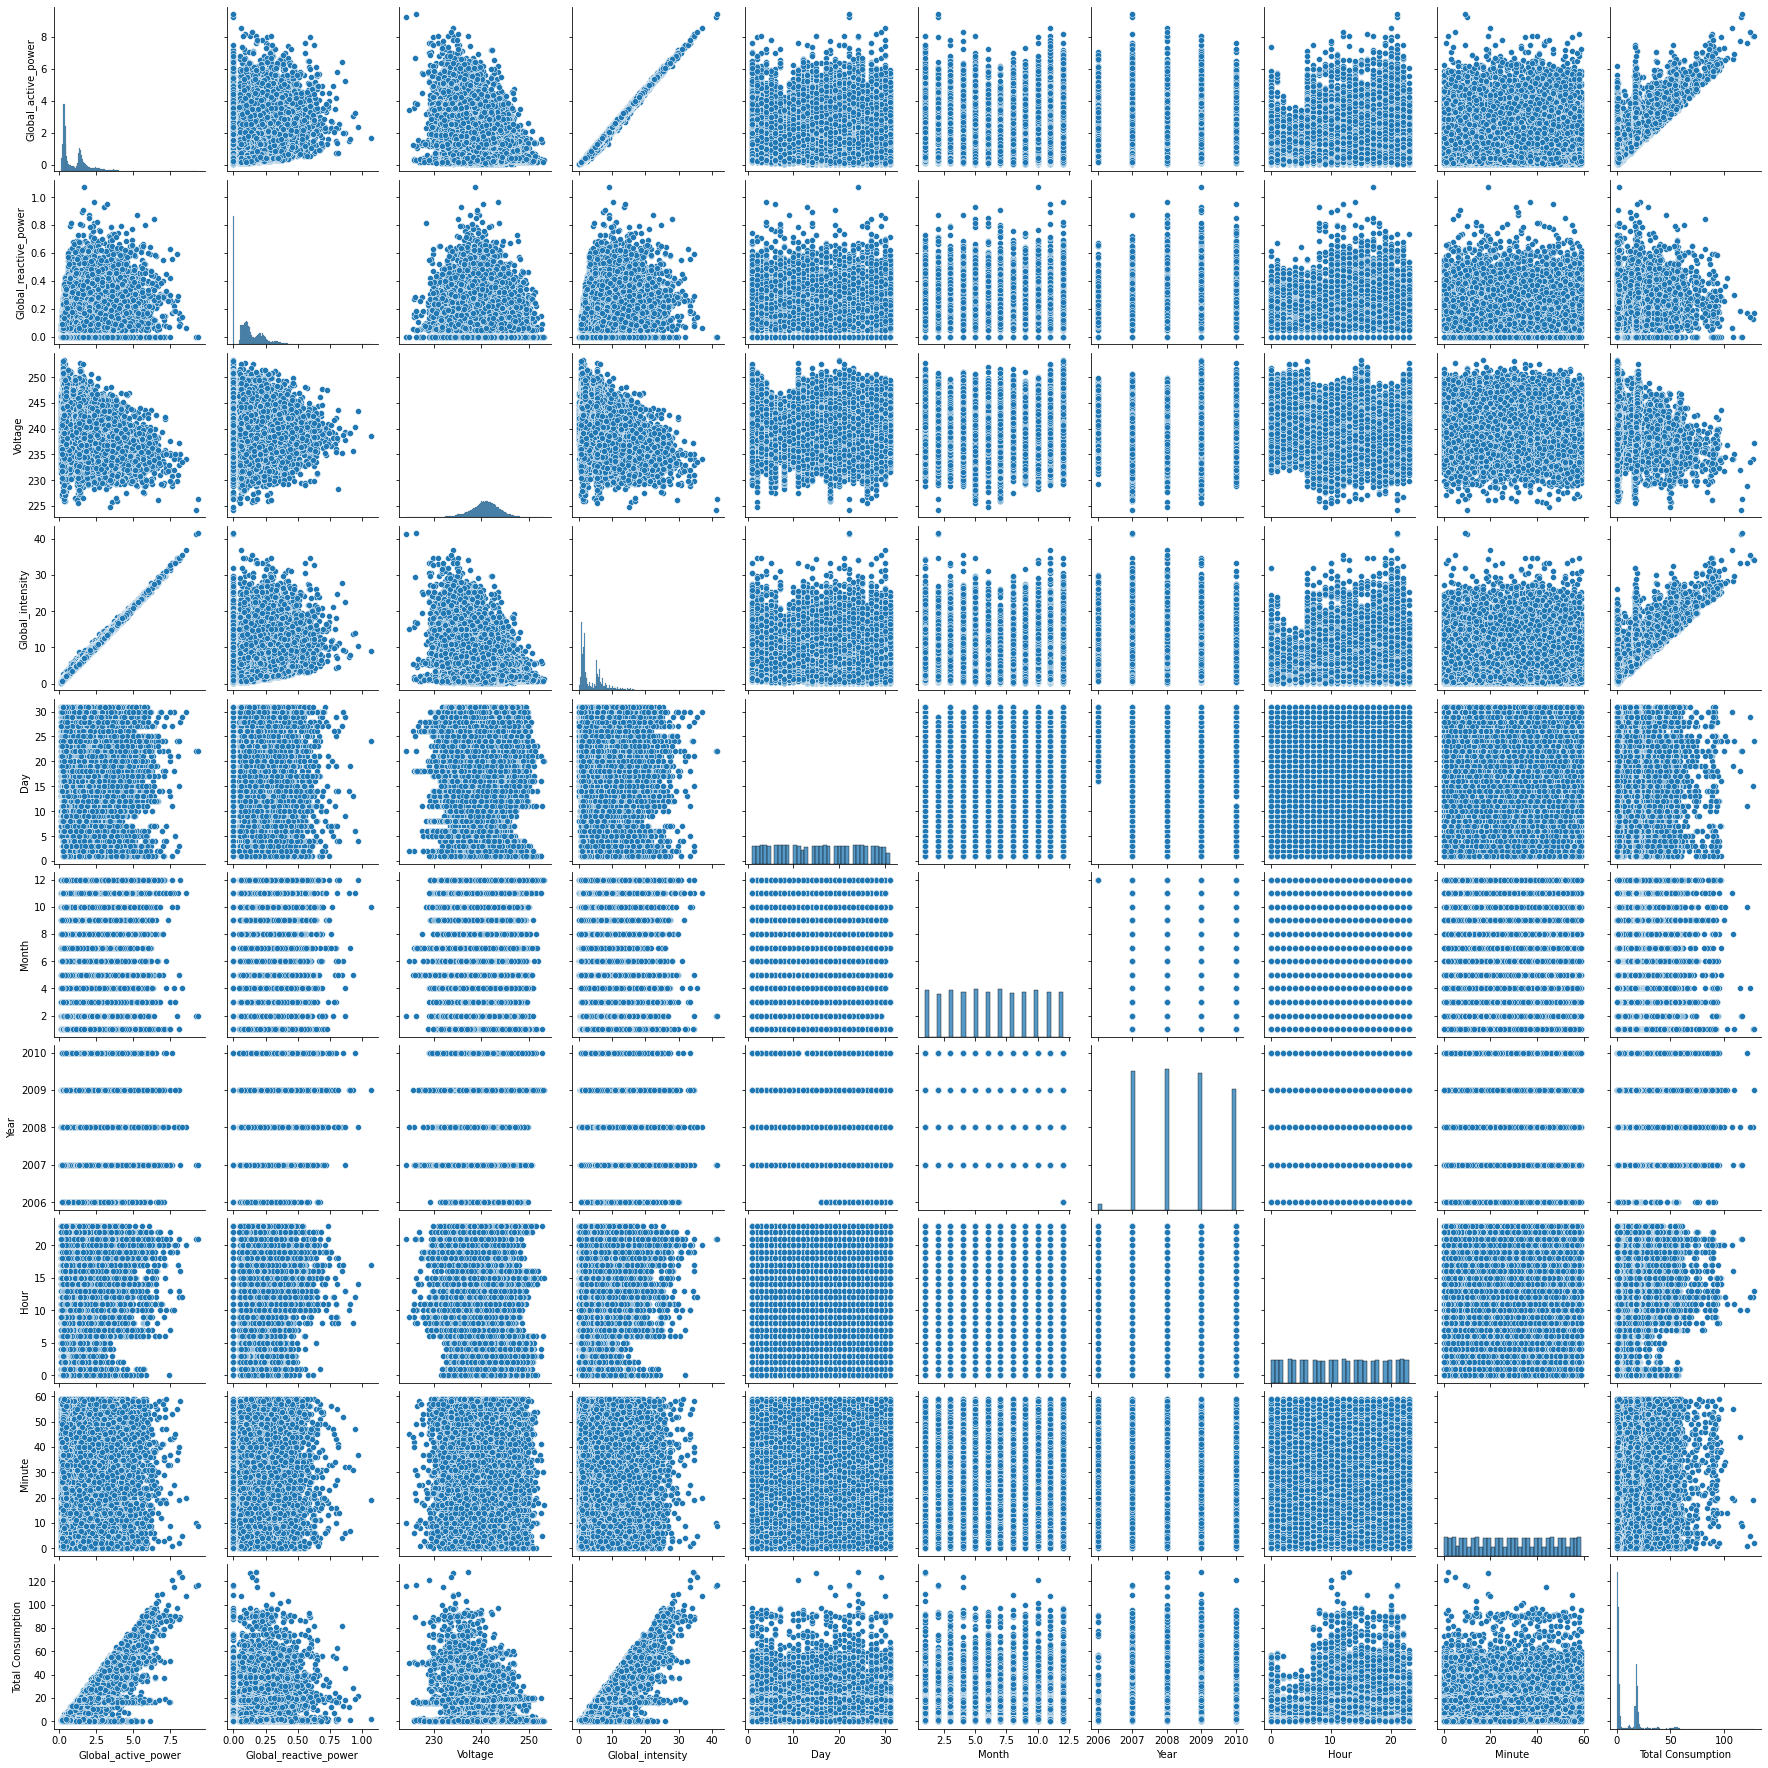

In [84]:
sns.pairplot(data)

In [86]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minute,Total Consumption
0,1.524,0.298,238.22,6.4,7,11,2008,18,33,18.0
1,0.408,0.210,246.33,1.8,17,2,2008,5,41,0.0
2,0.684,0.248,244.05,3.0,4,8,2009,15,32,2.0
3,0.652,0.300,243.59,2.8,19,3,2010,6,59,2.0
4,0.212,0.000,243.17,0.8,29,12,2008,21,4,0.0


## Train Test Split

In [87]:
X = data.drop(['Total Consumption'],axis=1)
y = data['Total Consumption']

In [88]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minute
0,1.524,0.298,238.22,6.4,7,11,2008,18,33
1,0.408,0.210,246.33,1.8,17,2,2008,5,41
2,0.684,0.248,244.05,3.0,4,8,2009,15,32
3,0.652,0.300,243.59,2.8,19,3,2010,6,59
4,0.212,0.000,243.17,0.8,29,12,2008,21,4


In [89]:
y

0        18.0
1         0.0
2         2.0
3         2.0
4         0.0
         ... 
49995    19.0
49996     0.0
49997     1.0
49998     1.0
49999     2.0
Name: Total Consumption, Length: 49407, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.30, random_state= 10)

In [102]:
X_train.shape

(34584, 9)

In [103]:
y_train.shape

(34584,)

In [104]:
X_test.shape

(14823, 9)

In [105]:
y_test.shape

(14823,)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [107]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
X_train

array([[ 0.28970244, -0.27145516,  0.03630539, ...,  1.39978814,
         0.07953855,  0.14972261],
       [-0.54800906,  0.03109667,  1.30286779, ..., -0.37683344,
        -0.93070953,  0.03492748],
       [-0.62553992,  0.65399749, -0.14064083, ..., -0.37683344,
         0.80114432,  0.26451775],
       ...,
       [ 0.71706767, -0.0934835 ,  0.68510819, ...,  1.39978814,
        -0.0647826 , -0.48165064],
       [ 0.535532  , -0.60960132, -1.20542246, ..., -1.26514423,
         0.80114432, -1.1130239 ],
       [-0.77303765, -1.10792197,  2.27762414, ...,  0.51147735,
        -1.50799414, -0.76863848]])

In [109]:
X_test

array([[-0.78438363, -1.10792197,  0.86515872, ...,  0.51147735,
        -1.21935183, -1.51480688],
       [ 0.29726643, -0.50281832,  0.66337795, ...,  1.39978814,
        -0.20910376, -1.1130239 ],
       [ 2.39249067,  0.066691  , -0.81427819, ...,  0.51147735,
        -0.35342491, -0.02247009],
       ...,
       [-0.82220356, -1.10792197,  1.09798269, ...,  0.51147735,
        -1.50799414,  0.89589101],
       [ 0.35966932, -0.55620982, -0.64664493, ...,  1.39978814,
         0.94546547,  1.01068614],
       [ 0.34075935,  0.67179465, -0.07545012, ...,  0.51147735,
        -0.20910376, -0.59644578]])

### <span style='color:Green '> Model1: Linear Regression</span>

In [111]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [112]:
linear_model.fit(X_train,y_train)

LinearRegression()

#### <span style='color:blue'> Pickling Linear Regression Model</span>

In [115]:
import pickle
# Standard scaler object
with open('electric_power_standardscaler.sav','wb')as f:
    pickle.dump(scaler,f)

In [116]:
# writing different model files to file
with open('linearmodelForPrediction.pkl','wb') as f:
    pickle.dump(linear_model,f)

In [117]:
with open('linearmodelForPrediction.pkl','rb')as f:
    c=pickle.load(f)

In [118]:
c

LinearRegression()

In [113]:
y_predict = linear_model.predict(X_test)

In [114]:
y_predict

array([ 2.02759951, 13.45752536, 36.32897797, ...,  1.75269701,
       13.80708103, 13.39716092])

In [119]:
## print the coefficients
print(linear_model.coef_)

[ 2.26080712e+01 -1.66365288e-01 -5.26901952e-01 -1.16392089e+01
  2.14335573e-02 -3.80413656e-02  7.11384553e-01 -1.00807305e+00
 -4.69519498e-02]


In [120]:
## print the intercept
print(linear_model.intercept_)

8.852619708535748


### <span style='color:Green '> Assumption of Linear Regression</span>

Text(0, 0.5, 'Test Predicted Data')

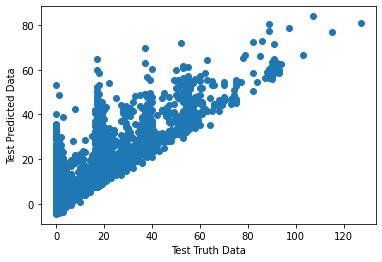

In [121]:
plt.scatter(y_test,y_predict)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

## <span style='color:Green '>Residuals</span>
#### If we calculate Residuals(Error) and make plot then it should follow the normal distribution

In [122]:
residuals=y_test-y_predict

In [123]:
residuals

7093     -1.027600
7935      6.542475
26236    19.671022
31083    -0.104888
2319      1.414900
           ...    
38278    -3.476141
18309     5.965188
49861    -1.752697
47399     4.192919
49884     4.602839
Name: Total Consumption, Length: 14823, dtype: float64

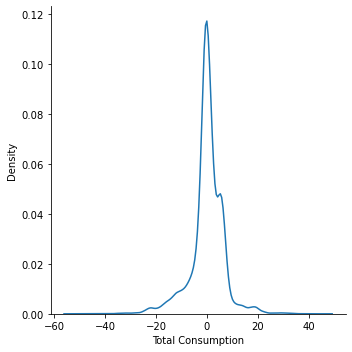

In [124]:
sns.displot(residuals,kind="kde")

#### If we plot residuals values and y_predict values on graph they should follow the uniform distribution

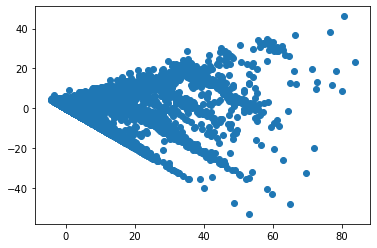

In [125]:
plt.scatter(y_predict,residuals)

### <span style='color:Green '>Performance Metrics</span>

In [126]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(np.sqrt(mean_squared_error(y_test,y_predict)))

44.59970073824428
4.3418228999310005
6.678300737331637


### <span style='color:Green '>R square and adjusted R square</span>

In [127]:
# Display R-Square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
print(score)

0.7352490330363646


In [140]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.735074547218261

### <span style='color:Green '>Accuracy Score</span>

#### Model1: Linear Regression Model- Accuracy Score is 73%

### <span style='color:red '>Model2: Ridge Regression</span>

In [129]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [130]:
ridge.fit(X_train,y_train)

Ridge()

In [131]:
ridge_pred=ridge.predict(X_test)

### <span style='color:red '>Assumptions Of Ridge Regression</span>

Text(0, 0.5, 'Test Predicted Data')

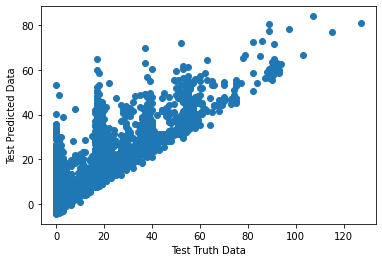

In [132]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [133]:
## residuals
residuals=y_test - ridge_pred

In [134]:
residuals

7093     -1.024656
7935      6.547205
26236    19.671730
31083    -0.120033
2319      1.391474
           ...    
38278    -3.457190
18309     5.979631
49861    -1.746781
47399     4.214774
49884     4.626532
Name: Total Consumption, Length: 14823, dtype: float64

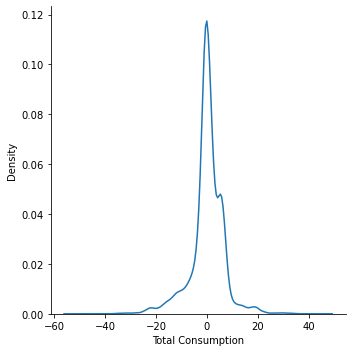

In [135]:
sns.displot(residuals,kind="kde")

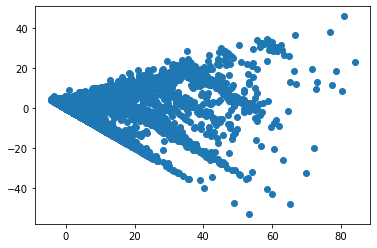

In [136]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(ridge_pred,residuals)

In [137]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

44.60199542442023
4.343049059254206
6.67847253677218


### <span style='color:red '>R square and Adjusted R square (Ridge Regression)</span>

In [138]:
# R Square
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.7352354114116921


In [139]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.735074547218261

### <span style='color:red '>Accuracy Score</span>

#### Model2: Ridge Regression Model- Accuracy Score is 73%

### <span style='color:skyblue'>Model3: Lasso Regression</span>

In [141]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

In [142]:
lasso.fit(X_train,y_train)

Lasso()

In [143]:
lasso_pred = lasso.predict(X_test)

### <span style='color:skyblue'>Assumptions Of Lasso Regression</span>

Text(0, 0.5, 'Test Predicted Data')

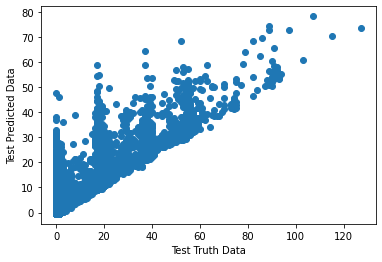

In [144]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [145]:
## residuals
residuals=y_test - lasso_pred

In [146]:
residuals

7093     -0.129508
7935      8.220468
26236    23.590703
31083    -1.047257
2319     -0.432833
           ...    
38278    -1.134930
18309     7.412079
49861    -0.757130
47399     5.606044
49884     5.792233
Name: Total Consumption, Length: 14823, dtype: float64

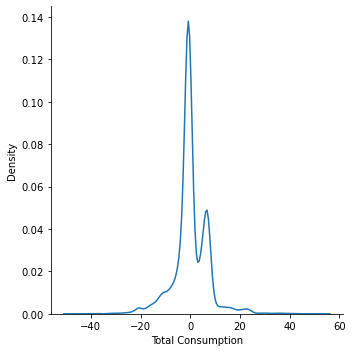

In [147]:
sns.displot(residuals,kind="kde")

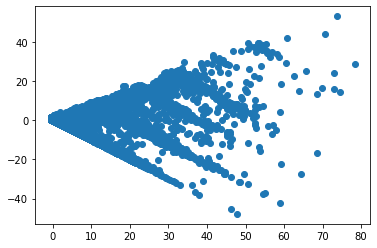

In [148]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(lasso_pred,residuals)

In [149]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

47.92833718129749
4.519788665981531
6.923029480025164


### <span style='color:skyblue'>R square and adjusted R square (Lasso Regression)</span>

In [152]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print(score)

0.7154897139740944


In [151]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7153168527998398

### <span style='color:skyblue '>Accuracy Score</span>

#### Model3: Lasso Regression Model- Accuracy Score is 71%

### <span style='color:orange'>Model4: ElasticNet Regression</span>

In [153]:
# Elasticnet
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [154]:
elastic.fit(X_train,y_train)

ElasticNet()

In [155]:
elastic_pred = elastic.predict(X_test)

### <span style='color:orange'>Assumptions Of ElasticNet Regression</span>

Text(0, 0.5, 'Test Predicted Data')

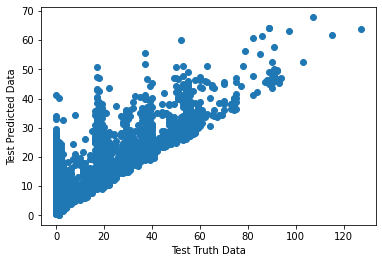

In [156]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [157]:
## residuals
residuals=y_test - elastic_pred

In [158]:
residuals

7093     -1.040431
7935      8.998836
26236    27.347829
31083    -2.381310
2319     -1.146870
           ...    
38278    -2.119695
18309     7.689836
49861    -1.606355
47399     6.012018
49884     6.415962
Name: Total Consumption, Length: 14823, dtype: float64

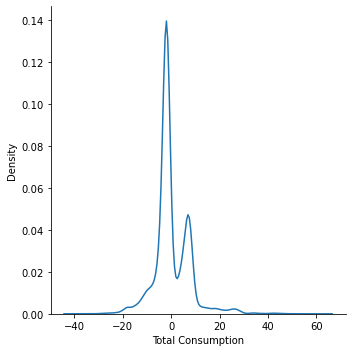

In [159]:
sns.displot(residuals,kind="kde")

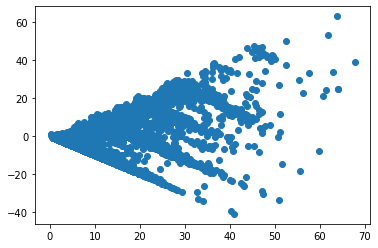

In [160]:
## Scatter plot with predictions and residual
##uniform distribution
plt.scatter(elastic_pred,residuals)

In [161]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

54.262032480301436
5.123853610892915
7.366276704027716


### <span style='color:orange'>R square and adjusted R square (ElasticNet Regression)</span>

In [162]:
from sklearn.metrics import r2_score
score=r2_score(y_test,elastic_pred)
print(score)

0.6778918842329091


In [163]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6776961795787605

### <span style='color:orange '>Accuracy Score</span>

#### Model4: ElasticNet Regression Model- Accuracy Score is 71%